# **Email Spam Detection with Machine Learning**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
em = pd.read_csv("/content/spam.csv", encoding="latin-1", usecols=["v1","v2"])

In [4]:
em

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Data Analysis and Processing**

In [5]:
em.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)

In [6]:
em

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
em.shape

(5572, 2)

In [8]:
em.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
  em.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
em.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
em.duplicated().sum()

403

In [15]:
em = em.drop_duplicates(keep="first")

In [16]:
em.duplicated().sum()

0

In [17]:
em.dtypes

Category    object
Message     object
dtype: object

In [20]:
em

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
em["Category"].value_counts()

0    4516
1     653
Name: Category, dtype: int64

# **Data Visualization**

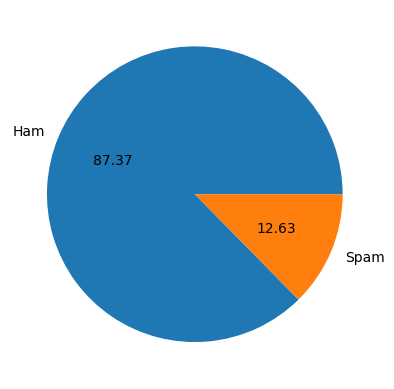

In [22]:
plt.pie(em["Category"].value_counts(),autopct = "%.2f",labels=['Ham','Spam'])
plt.show()

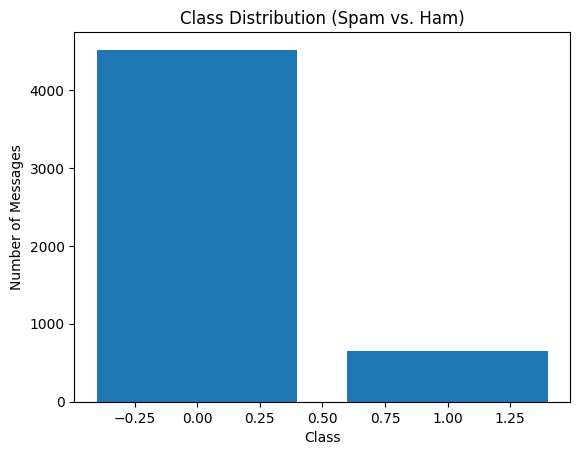

In [23]:
class_counts = em['Category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Messages')
plt.title('Class Distribution (Spam vs. Ham)')
plt.show()

# **Model Training**

In [24]:
x = em['Message']
y = em["Category"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
model = LogisticRegression()
model.fit(X_train_cv, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test_cv)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_cv, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[885   4]
 [ 18 127]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9787234042553191
Precision: 0.9694656488549618
Recall: 0.8758620689655172
F1 score: 0.9202898550724637


In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

MultinomialNB()

In [35]:
custom_word = "Internship Offer"
custom_word_vec = vectorizer.transform([custom_word])
prediction = classifier.predict(custom_word_vec)[0]
if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"
print(f"Custom word '{custom_word}' is predicted as: {prediction}")

Custom word 'Internship Offer' is predicted as: Spam
